# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# План исследования
        Шаг 1. Откройте файл с данными и изучите общую информацию
- Путь к файлу: /datasets/games.csv. Скачать датасет

        Шаг 2. Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

        Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

        Шаг 4. Составьте портрет пользователя каждого региона
- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

        Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.
- Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

        Шаг 6. Напишите общий вывод


# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [1]:
# Импортируем все нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
# Открываем файл двумя путями, локальным и серверным
server_path = '/datasets/games.csv'
local_path_users = '/Users/mmaximmaximovgmail.com/Desktop/DS/first_full_project/games.csv'
try:
    games = pd.read_csv(server_path)
except:
    games = pd.read_csv(local_path_users)

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

In [6]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Первичный вывод по данным
- Имеются пропуски в столбцах `Rating`, `User_Score`, `Critic_Score`, `Year_of_Release`
- Не подходящий тип данных для столбцов `Year_of_Release`, `User_Score`, `Critic_Score`
- Название всех столбцов приводим к нижниму регистру

## Шаг 2. Подготовьте данные

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2.1 Замените названия столбцов (приведите к нижнему регистру);

In [8]:
# Можно заменить название столбцов двумя путями: 1 - Написать новые столбцы и присвоить новую переменную к ним,
# 2 - .rename(). Я же использую второй способ 
#games = games.rename(columns = {
#    'Name' : 'name',
#    'Platform':'platform',
#    'Year_of_Release':'year_of_release',
#    'Genre':'genre',
#    'NA_sales':'na_sales',
#    'EU_sales':'eu_sales',
#    'JP_sales':'jp_sales',
#    'Other_sales':'other_sales',
#    'Critic_Score':'critic_score',
#    'User_Score':'user_score',
#    'Rating':'rating'
#})

games.columns = games.columns.str.lower()

### 2.2 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [9]:
# Заменим тип данных в столбцах `year_of_release`, меняем на int
games = games.dropna(subset=['year_of_release'])
#games['year_of_release'] = games['year_of_release'].astype('int64')

In [10]:
games['year_of_release'].isna().sum()

0

In [11]:
#Напишем цикл где будем делать замену на года тех у кого совпадает название с игрой но в графе year_of_release пусто
#for i in games[games['year_of_release'].isnull() == True].index:  
#    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()

### 2.3 Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;


In [12]:
# Заполним мелкие пропуски в столбцах `Name` и `Genre` на пустые строки
games.fillna({
    'name':" ",
    'genre':" "},
    inplace = True
)

# Что бы заменить тип в столбце `user_score`, нужно сначала заменить `tbd` на NaN
# расшифровака `tbd` - to be determined(ENG), Подлежит определению(RUS)
games['user_score'] = games['user_score'].replace('tbd','NaN')
games['user_score'] = games['user_score'].astype('float')

# Пытался заменить тип в данном столбце но не понял причины ошибки
#games['critic_score'] = games['critic_score'].astype('Int')

### 2.4 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [13]:
#games['full_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

In [14]:
games['full_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [15]:
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  full_sales       16446 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' ' ' Beyblade Burst' ' Fire Emblem Fates' ... 'uDraw Studio'
 'uDraw Studio: Instant Artist' '¡Shin Chan Flipa en colores!']
name  : кол-во 0 0 , процент 0 0

In [16]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
#games = games.query('user_score>=0')
#games = games.query('critic_score>=0')
#games['critic_score'] = games['critic_score'].dropna()
games['critic_score'].isna().sum()

0

In [18]:

len(temp), len(games)

(16446, 16446)

# Шаг 3. Проведите исследовательский анализ данных

### 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<AxesSubplot:title={'center':'Кол-во выпущенных игр в разные года'}, xlabel='Год', ylabel='Кол-во'>

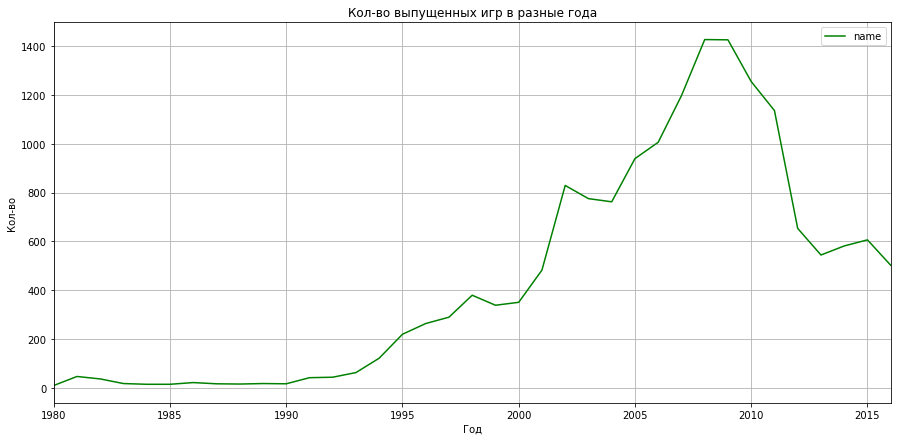

In [19]:
sum_game = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
sum_game.plot(
    title='Кол-во выпущенных игр в разные года',
    ylabel='Кол-во',
    xlabel='Год',
    xlim = (1980, 2016),
    grid=True,
    figsize=(15,7),
    color='g'
)

### Мини вывод
- Наблюдаем за тем, как в период с 2000 годов и по сей день активней начали выпускать игры
- Пик был 2008 и 2009 году

### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

### 3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

### 3.4 Не учитывайте в работе данные за предыдущие годы.

### 3.5 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

<AxesSubplot:title={'center':'Кол-во продаж игр на разных платформах'}, xlabel='Платформы', ylabel='Кол-во'>

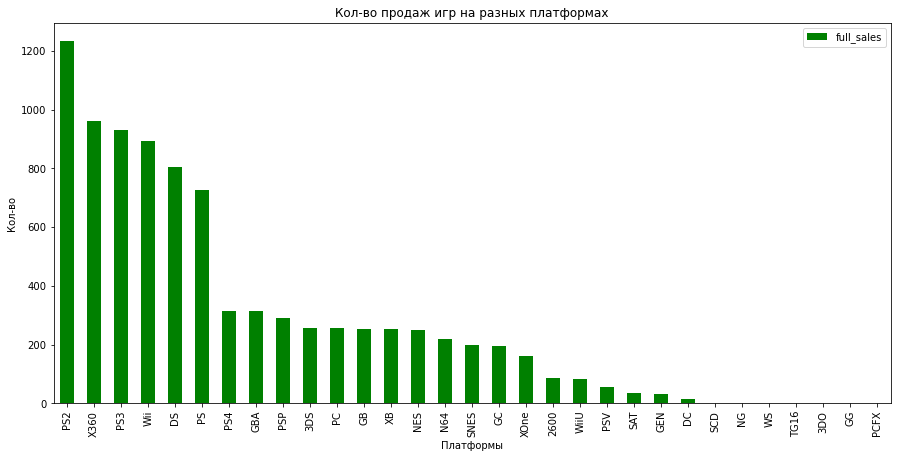

In [20]:
# Строим график, который покажет продажи игр на всех платформах.
sales_games = (games
               .pivot_table(index='platform', values='full_sales', aggfunc='sum')
               .sort_values(by='full_sales', ascending=False)
)
sales_games.plot(
    title='Кол-во продаж игр на разных платформах',
    xlabel='Платформы',
    ylabel='Кол-во',
    kind='bar',
    figsize = (15, 7),
    color = 'g',
)

### Мини вывод
- По графиу видно, что популярные платформы на которвых продавались игры: PS2, X360, PS3, Wii, DS 

In [21]:
period = games.copy()
period = period[period.year_of_release >= 2012]

# Функция которая позволит понять кол-во продаж на разных платформах за определенный период
def year_total_sale_for_platform(name, data):
    # В новой переменной присвоили название платформ и за какой период будет рассматривать
    slicee = period[(period['platform'] == name)]
    # Преобразовываем в свобдную таблицу, сортируем по столбцу годова
    total = (slicee
             .pivot_table(index='year_of_release', values='full_sales', aggfunc='sum')
             .sort_values('year_of_release', ascending=False))
    # Возращаем переменную total
    return total

In [22]:
# Создадим свою таблицу по платформам и их обшим продажам. Отсортируем их по убыванию и оставим только топ 5
top_5_platforms = (period
                   .pivot_table(index='platform', values='full_sales', aggfunc='sum')
                   .sort_values(by='full_sales', ascending=False)
                  .head())
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

In [23]:
top_5_platforms

,platform,full_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


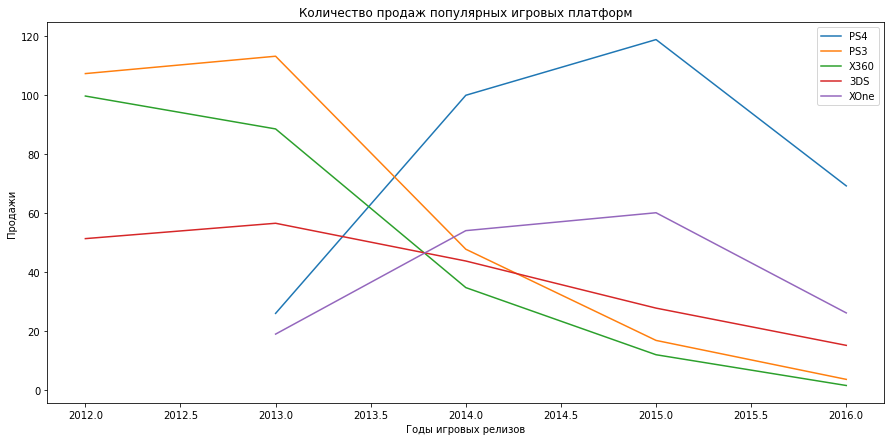

In [24]:
# Отрисуем все игровые платформы и их поведение
plt.figure(figsize=(15,7))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i, games)['full_sales'], label=i)
    plt.legend()

### Мини вывод 
- Самой продаваемой платформой считается PS4
- Практически все платформы для игр живут почти что 10 лет, даже чуть меньше
- Пик продаваемых игр на разных платформах наступает примерно через 5 лет, хотя у PS4 спустя 2 года, т.к компания была уже известна

In [25]:

temp1 = games.copy()
temp1 = temp1[temp1.year_of_release >= 2012]
temp1.year_of_release.min()

2012.0

### 3.6 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [26]:

games.year_of_release.min()

1980.0

In [27]:
# Сохраним в переменной games_top_5_platforms топ 5 платформ и избавимся от выбросов
list_top5 = games[games.year_of_release>=2012]
list_top5 = ['PS4','PS3','X360','3DS','XOne']
games_top_5_platforms = games[games['platform'].isin(['PS4','PS3','X360','3DS','XOne'])]
games_top_5_platforms = games_top_5_platforms.query('year_of_release>=2012')

In [28]:
games_top_5_platforms.year_of_release.min()

2012.0

Text(0, 0.5, 'Глобальные продажи')

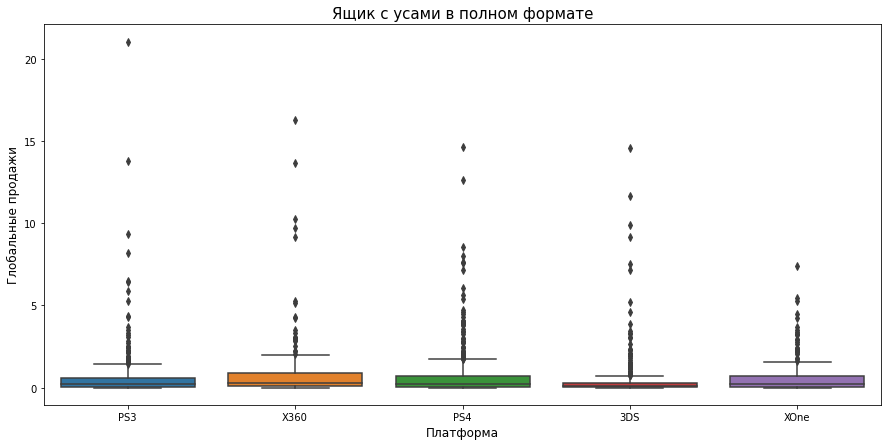

In [29]:
# Рисуем ящики с усами в полном формате
plt.figure(figsize=(15,7))
sns.boxplot(data=games_top_5_platforms, x='platform', y='full_sales')
plt.title('Ящик с усами в полном формате', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Text(0, 0.5, 'Глобальные продажи')

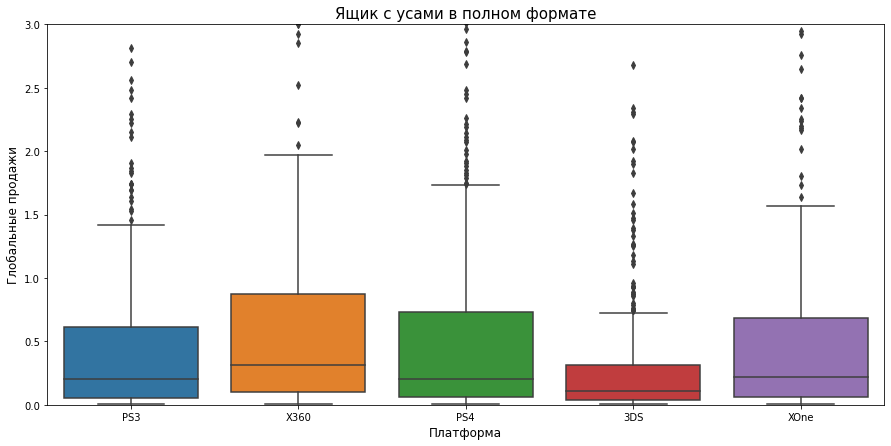

In [30]:
# Рисуем ящики с усами с крупными боксплотами
#games_top_5_platforms = games_top_5_platforms[games_top_5_platforms['full_sales']<3]
plt.figure(figsize=(15,7))
sns.boxplot(data=games_top_5_platforms, x='platform', y='full_sales')
plt.ylim(0,3)
plt.title('Ящик с усами в полном формате', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

### Мини вывод
- Из графиков видно, что медиана у каждой платформы разная 
- Больше всего продаж у X360, меньше всего у 3DS

### 3.7 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [31]:
period_user = period[period.user_score >= 0]

In [32]:
# Сначала построим диаграмму рассеяивания для отзывов пользователей и посчитаем ее корреляцию 
games_ps4_user = period_user[(period_user['platform']=='PS4')]
# Считаем корреляцию пользователей
games_ps4_user['user_score'].corr(games_ps4_user['full_sales'])

-0.03195711020455646

In [33]:
games_ps4_user.user_score.min()

1.5

<AxesSubplot:xlabel='user_score', ylabel='full_sales'>

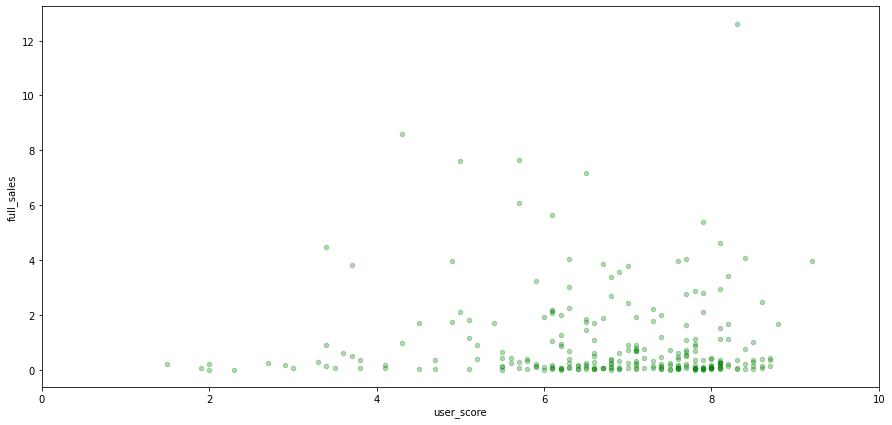

In [34]:
# Диаграмма рассеивания пользователей
games_ps4_user.plot(
    kind='scatter', 
    x='user_score', 
    y='full_sales', 
    figsize=(15, 7), 
    alpha=0.3, 
    color = 'g', 
    xlim=(0,10)
              )

In [36]:
period_critic = period[period.critic_score >= 0]

In [37]:
# Cчитем корреляцию по оценке критиков
games_ps4_critic = period_critic[(period_critic['platform']=='PS4')]
games_ps4_critic['critic_score'].corr(games_ps4_critic['full_sales'])

0.40656790206178145

In [38]:

games_ps4_critic.critic_score.min()

19.0

<AxesSubplot:xlabel='critic_score', ylabel='full_sales'>

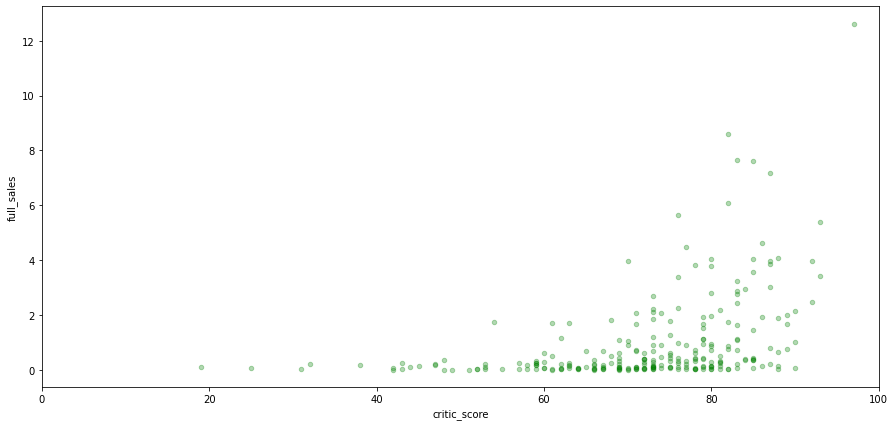

In [39]:
# Диаграмма рассеивания по оценке критиков
games_ps4_critic.plot(
    x='critic_score', 
    y='full_sales', 
    kind='scatter', 
    figsize=(15, 7), 
    color='g', 
    alpha=0.3, 
    xlim=(0,100)
)

### 3.8 Соотнесите выводы с продажами игр на других платформах.

In [40]:
period_platforms_critic = period[period.critic_score >= 0]
period_platforms_users = period[period.user_score >= 0]

In [41]:
period1 = games.copy()
period1 = period1[period1.year_of_release >= 2012]
print(len(period1[period1.critic_score >= 0]))
print(len(period1[period1.user_score >= 0]))
print(len(period1[(period1.critic_score >= 0) & (period.user_score >= 0)]))

1312
1531
1297


In [42]:
# Распишим функцию которая будет считать корреляцию и строить графики для остальных топ5 платформ
def all_top5_platforms(games_platforms):
    platform_user = period_platforms_users[(period_platforms_users['platform']==games_platforms)]
    platform_critic = period_platforms_critic[(period_platforms_critic['platform']==games_platforms)]
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(x='user_score', y='full_sales', data=platform_user, ax=ax[0], color='g', alpha=0.3 )
    sns.scatterplot(x='critic_score', y='full_sales', data=platform_critic, ax=ax[1], color='g', alpha=0.3 )
    fig.suptitle(games_platforms, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(xlabel='Оценка критиков')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    cor_user = platform_user['user_score'].corr(platform_user['full_sales'])
    cor_critic = platform_critic['critic_score'].corr(platform_critic['full_sales'])
    
    if 0.3 >= cor_user >= 0.1:
        print('Корреляция оценки пользователей и продаж ', games_platforms, ': Слабая', cor_user)
    if 0.5 >= cor_user >= 0.3:
        print('Корреляция оценки пользователей и продаж ', games_platforms, ': Умеренная', cor_user)
    if 0.7 >= cor_user >= 0.5:
        print('Корреляция оценки пользователей и продаж ', games_platforms, ': Заметная', cor_user)
    if 0.9 >= cor_user >= 0.7:
        print('Корреляция оценки пользователей и продаж ', games_platforms, ': Высокая', cor_user)
    if 0.99 >= cor_user >= 0.9:
        print('Корреляция оценки пользователей и продаж ', games_platforms, ': Высокая весьма', cor_user)
        
    if 0.3 >= cor_critic >= 0.1:
        print('Корреляция оценки критиков и продаж ', games_platforms, ': Слабая', cor_critic)
    if 0.5 >= cor_critic >= 0.3:
        print('Корреляция оценки критиков и продаж ', games_platforms, ': Умеренная', cor_critic)
    if 0.7 >= cor_critic >= 0.5:
        print('Корреляция оценки критиков и продаж ', games_platforms, ': Заметная', cor_critic)
    if 0.9 >= cor_critic >= 0.7:
        print('Корреляция оценки критиков и продаж ', games_platforms, ': Высокая', cor_critic)
    if 0.99 >= cor_critic >= 0.9:
        print('Корреляция оценки критиков и продаж ', games_platforms, ': Высокая весьма', cor_critic)

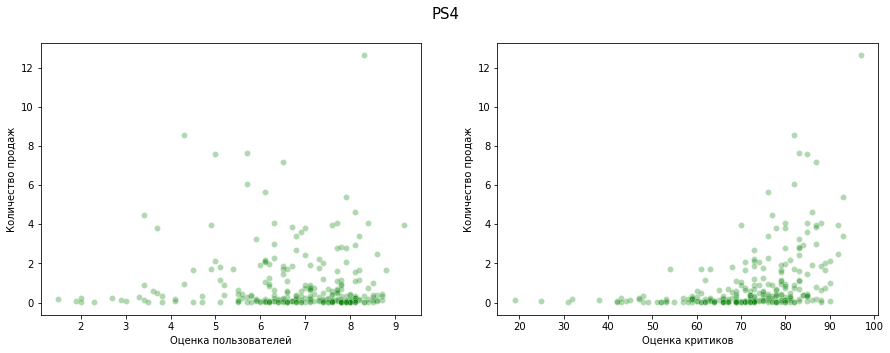

Корреляция оценки критиков и продаж  PS4 : Умеренная 0.40656790206178145


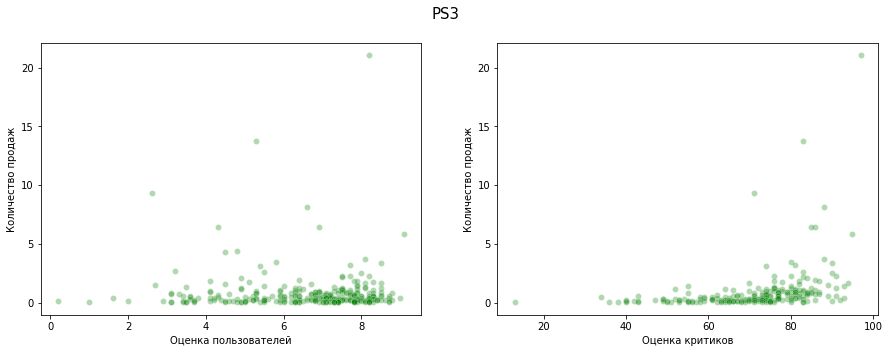

Корреляция оценки критиков и продаж  PS3 : Умеренная 0.331497259262959


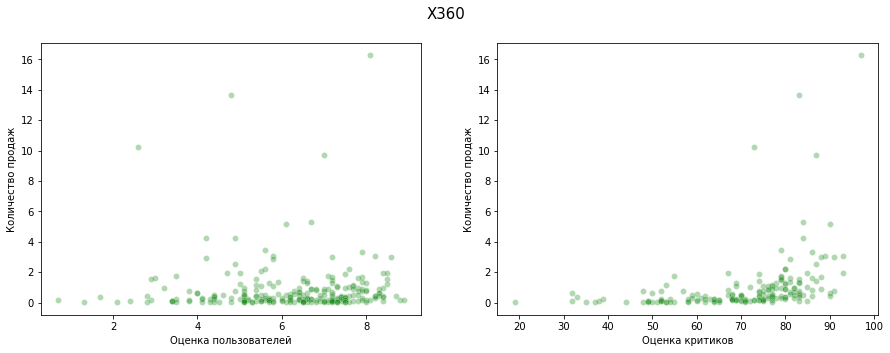

Корреляция оценки критиков и продаж  X360 : Умеренная 0.36057348885073387


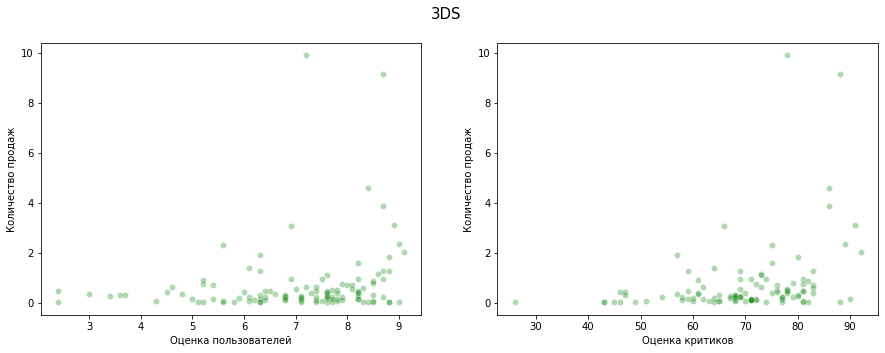

Корреляция оценки пользователей и продаж  3DS : Слабая 0.1975826341103859
Корреляция оценки критиков и продаж  3DS : Умеренная 0.3208028695360786


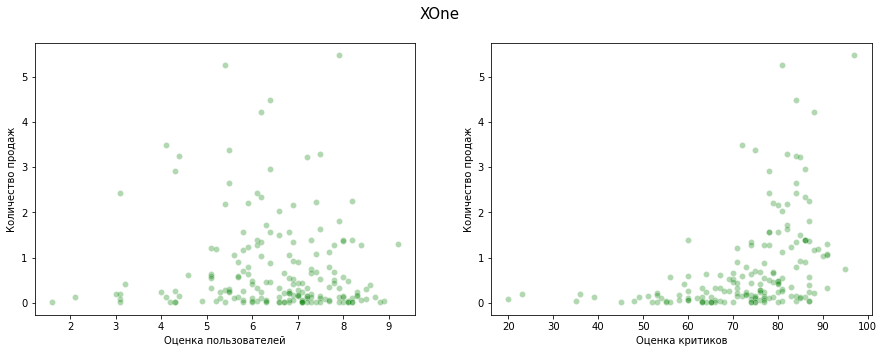

Корреляция оценки критиков и продаж  XOne : Умеренная 0.4169983280084016


In [43]:
#С помощью цикла выведем все 5 графиков
for platform in list_top5:
    all_top5_platforms(platform)

In [44]:
# Высчитываем среднее, медианну, стандартное отклонение, дисперсию топ 5 платформ для пользователей 
for platform in list_top5:
    print('Среднее', platform, ':', period_platforms_users[period_platforms_users['platform']==platform]['user_score'].mean())
    print('Медиана', platform, ':', period_platforms_users[period_platforms_users['platform']==platform]['user_score'].median())
    print('Дисперсия', platform, ':', np.var(period_platforms_users[period_platforms_users['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform, ':', np.std(period_platforms_users[period_platforms_users['platform']==platform]['user_score']))
    print('\n')

Среднее PS4 : 6.748249027237353
Медиана PS4 : 7.0
Дисперсия PS4 : 2.1217965449893263
Стандартное отклонение PS4 : 1.456638783291632


Среднее PS3 : 6.532862190812724
Медиана PS3 : 7.0
Дисперсия PS3 : 2.707789334365517
Стандартное отклонение PS3 : 1.6455361844594962


Среднее X360 : 6.2208510638297865
Медиана X360 : 6.5
Дисперсия X360 : 2.482075871435041
Стандартное отклонение X360 : 1.5754605267778183


Среднее 3DS : 7.033333333333332
Медиана 3DS : 7.4
Дисперсия 3DS : 2.177836257309941
Стандартное отклонение 3DS : 1.4757493883820318


Среднее XOne : 6.52142857142857
Медиана XOne : 6.8
Дисперсия XOne : 1.8965188383045533
Стандартное отклонение XOne : 1.3771415462124992




In [45]:
# Высчитываем среднее, медианну, стандартное отклонение, дисперсию топ 5 платформ для критиков 
for platform in list_top5:
    print('Среднее', platform, ':', period_platforms_critic[period_platforms_critic['platform']==platform]['critic_score'].mean())
    print('Медиана', platform, ':', period_platforms_critic[period_platforms_critic['platform']==platform]['critic_score'].median())
    print('Дисперсия', platform, ':', np.var(period_platforms_critic[period_platforms_critic['platform']==platform]['critic_score']))
    print('Стандартное отклонение', platform, ':', np.std(period_platforms_critic[period_platforms_critic['platform']==platform]['critic_score']))
    print('\n')

Среднее PS4 : 72.09126984126983
Медиана PS4 : 73.0
Дисперсия PS4 : 155.28135235575724
Стандартное отклонение PS4 : 12.461193857562655


Среднее PS3 : 71.56542056074767
Медиана PS3 : 74.0
Дисперсия PS3 : 177.46067342125946
Стандартное отклонение PS3 : 13.321436612515162


Среднее X360 : 70.87134502923976
Медиана X360 : 74.0
Дисперсия X360 : 200.28754146575014
Стандартное отклонение X360 : 14.152298098392011


Среднее 3DS : 69.8173076923077
Медиана 3DS : 71.0
Дисперсия 3DS : 143.4377773668639
Стандартное отклонение 3DS : 11.976551146589067


Среднее XOne : 73.32544378698225
Медиана XOne : 76.0
Дисперсия XOne : 166.79941178530163
Стандартное отклонение XOne : 12.915084660400087




    Мы искали это, для того чтобы понять, каким отзывам больше доверяют покупатели. Большинство значений оценок критиков лучше чем оценки пользователей, не существенно, но для анализа сойдет, поэтому от этого идет мини вывод

### Мини вывод
- Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам чем к оценкам других пользователейё

### 3.9 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [46]:
period_genre = games.copy()
period_genre = period_genre[period_genre.year_of_release >= 2012]

games_genre = (period_genre.pivot_table(
    index='genre', 
    values='full_sales',
    aggfunc='sum')
    .sort_values(
    by='full_sales',
    ascending=False
    )
)

In [47]:
games_genre

,full_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


<AxesSubplot:ylabel='full_sales'>

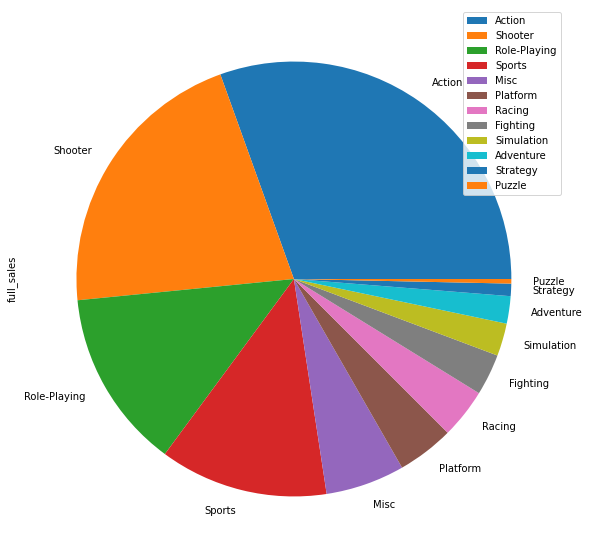

In [48]:
games_genre.plot(
    x='genre',
    y='full_sales',
    title='',
    kind='pie',
    figsize = (10, 10)
)

Text(0, 0.5, 'Глобальные продажи')

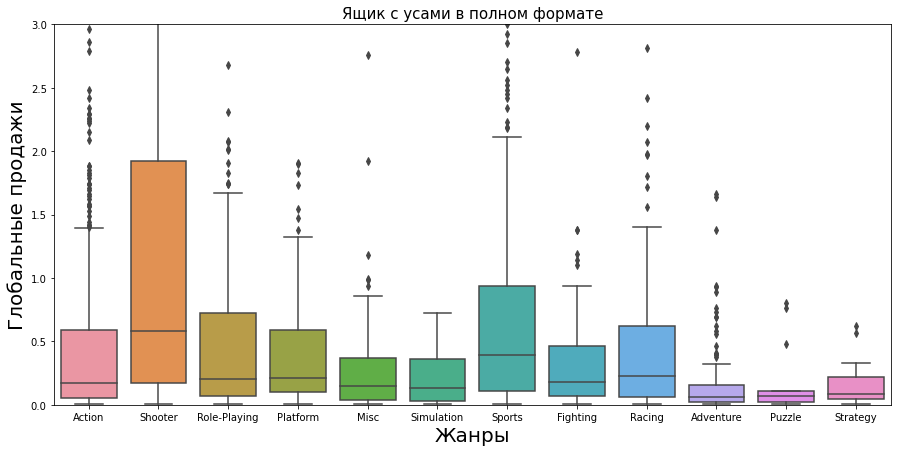

In [49]:
plt.figure(figsize=(15,7))
sns.boxplot(data=games_top_5_platforms, x='genre', y='full_sales')
plt.ylim(0,3)
plt.title('Ящик с усами в полном формате', fontsize=15)
plt.xlabel('Жанры', fontsize=20)
plt.ylabel('Глобальные продажи',fontsize=20)

## Вывод по 3 шагу
- Продаваемая жанр игра: Шутер
- Топ5 продаваемых платформ: 'PS4','PS3','X360','3DS','XOne'
- Массовый выпуск игра началася: 2000 году
- Пик выпоск игр: 08/09 года
- Средняя жизнь платформы: около 10 лет
- Покупатели прислушиваются больше : Критикам, чем пользователям


# Шаг 4. Составьте портрет пользователя каждого региона

## Определите для пользователя каждого региона (NA, EU, JP):

In [50]:
period_pic = games.copy()
period_pic['rating'] = period_pic['rating'].fillna('no_rating')

In [51]:
#Функция для создания сводных таблиц за последние 5 лет
def table(row, title):
    period_pic_2012 = period_pic[period_pic.year_of_release >= 2012]
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for tables, ax in zip(list(['platform','genre','rating']),axes.flatten()):
        ttable = period_pic_2012.pivot_table(index=tables, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index(
        ).rename_axis(None, axis=1
                     ).head(5)
        print(ttable)
        print('\n') 
        ttable.plot.pie(x=tables, y=row, figsize=(15,7), ax=ax, labels=ttable[tables])
        fig.suptitle(title, fontsize=15)
        

plt.show()
#sns.set()

#Функция для создания сводных таблиц за последний год
def table_2016(row, title):
    period_pic_2016 = period_pic[period_pic.year_of_release > 2015]
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    for tables, ax in zip(list(['platform','genre','rating']), axes.flatten()):
        ttable = period_pic_2016.pivot_table(index=tables, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ttable)
        print('\n')
        ttable.plot.pie(x=tables, y=row, figsize=(15,7), ax=ax, labels=ttable[tables])
        fig.suptitle(title, fontsize=15)


</font><font color='Blue'><b>Мне подсказали как сделать, но что-то не поулчается подставить нужные столбцы, постоянно вылазиет ошибка</b></font><br>

### 4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.
### 4.2 Самые популярные жанры (топ-5). Поясните разницу.

### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Пользователи Северной Америке

### Сайт о полной формулировки ESRB
https://dic.academic.ru/dic.nsf/ruwiki/140779

  platform  na_sales
0     X360    140.05
1      PS4    108.74
2      PS3    103.38
3     XOne     93.12
4      3DS     55.31


          genre  na_sales
0        Action    177.84
1       Shooter    144.77
2        Sports     81.53
3  Role-Playing     64.00
4          Misc     38.19


      rating  na_sales
0          M    231.57
1          E    114.37
2  no_rating    103.31
3       E10+     75.70
4          T     66.02




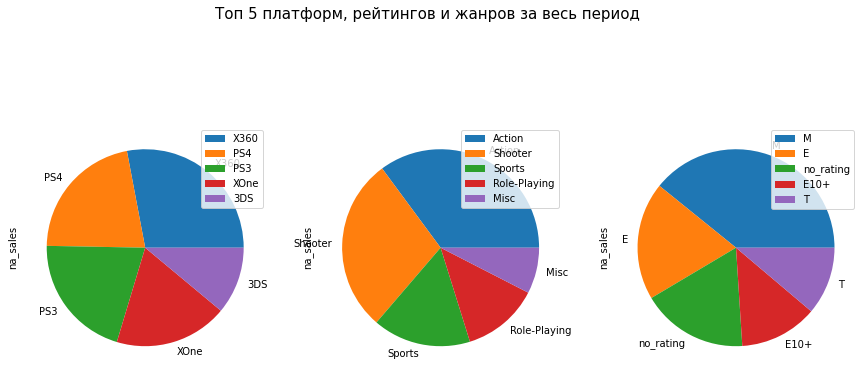

In [52]:
table('na_sales', 'Топ 5 платформ, рейтингов и жанров за весь период')

  platform  na_sales
0      PS4     21.49
1     XOne     14.27
2      3DS      4.14
3     WiiU      2.10
4       PC      1.36


          genre  na_sales
0       Shooter     16.24
1        Action      9.29
2        Sports      7.54
3  Role-Playing      5.89
4      Fighting      1.84


      rating  na_sales
0          M     15.67
1          T      8.95
2  no_rating      8.53
3          E      7.97
4       E10+      3.81




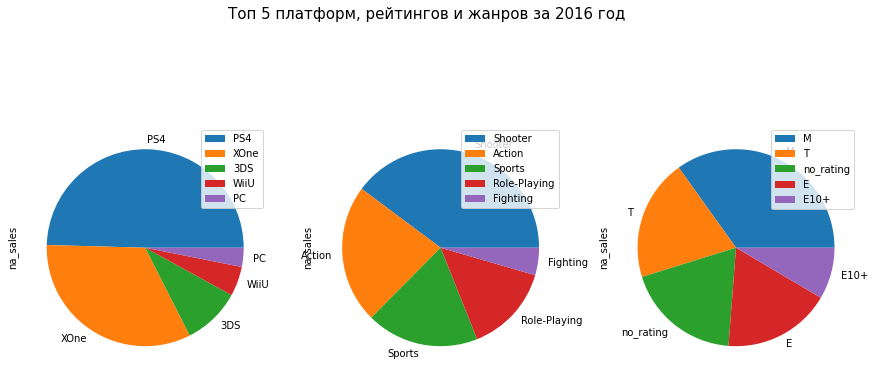

In [53]:
table_2016('na_sales', 'Топ 5 платформ, рейтингов и жанров за 2016 год')

### Пользователи Европы

  platform  eu_sales
0      PS4    141.09
1      PS3    106.86
2     X360     74.52
3     XOne     51.59
4      3DS     42.64


          genre  eu_sales
0        Action    159.34
1       Shooter    113.47
2        Sports     69.09
3  Role-Playing     48.53
4        Racing     27.29


      rating  eu_sales
0          M    193.96
1          E    113.03
2  no_rating     91.50
3       E10+     55.37
4          T     52.96




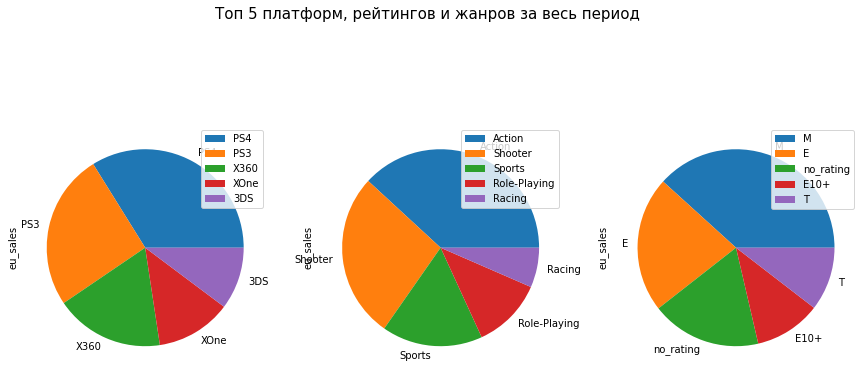

In [54]:
table('eu_sales', 'Топ 5 платформ, рейтингов и жанров за весь период')

  platform  eu_sales
0      PS4     31.78
1     XOne      9.63
2       PC      3.53
3      3DS      2.33
4     WiiU      1.48


          genre  eu_sales
0       Shooter     15.90
1        Sports     12.01
2        Action     10.68
3  Role-Playing      4.28
4        Racing      1.77


      rating  eu_sales
0          M     16.54
1          E     13.61
2          T      9.79
3  no_rating      7.47
4       E10+      3.81




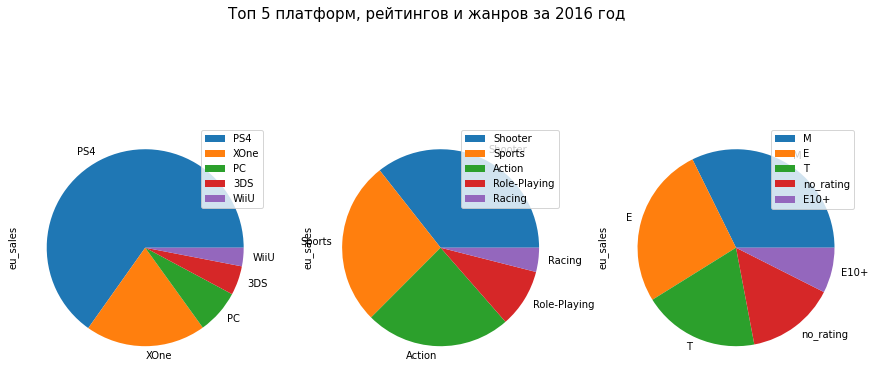

In [55]:
table_2016('eu_sales', 'Топ 5 платформ, рейтингов и жанров за 2016 год')

### Пользователи Японии

  platform  jp_sales
0      3DS     87.79
1      PS3     35.29
2      PSV     21.04
3      PS4     15.96
4     WiiU     13.01


          genre  jp_sales
0  Role-Playing     65.44
1        Action     52.80
2          Misc     12.86
3    Simulation     10.41
4      Fighting      9.44


      rating  jp_sales
0  no_rating    108.84
1          E     28.33
2          T     26.02
3          M     21.20
4       E10+      8.19




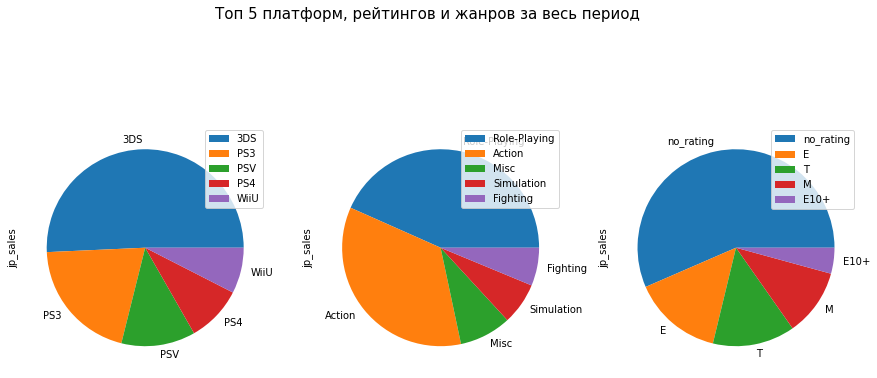

In [56]:
table('jp_sales', 'Топ 5 платформ, рейтингов и жанров за весь период')

In [57]:
temp = games.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

6678 0.4060561838744984


E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

  platform  jp_sales
0      3DS      8.03
1      PS4      5.74
2      PSV      3.56
3      PS3      1.30
4     WiiU      0.67


          genre  jp_sales
0        Action      7.07
1  Role-Playing      6.61
2     Adventure      1.18
3       Shooter      1.06
4          Misc      1.04


      rating  jp_sales
0  no_rating     14.32
1          T      2.27
2          M      1.20
3          E      1.07
4       E10+      0.45




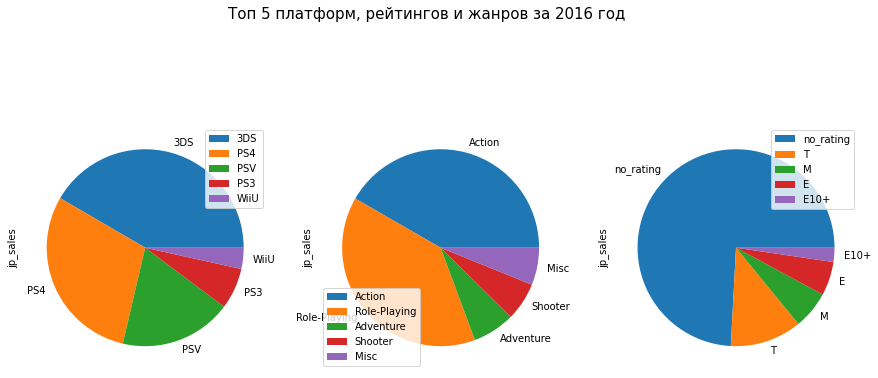

In [58]:
table_2016('jp_sales', 'Топ 5 платформ, рейтингов и жанров за 2016 год')

## Вывод по 4 шагу 
     За весь период

- Северная Америка:
1. Любимая платформа: X360
2. Жанр: Экшн
3. Рэйтинг: M

- Европа:
1. Любимая платформа: PS4
2. Жанр: Экшн
3. Рэйтинг: M

- Япония:
1. Любимая платформа: 3Ds
2. Жанр: Role-Playing
3. Рэйтинг: Е

       За 2016 год
       
- Северная Америка:
1. Любимая платформа: PS4
2. Жанр: Шутер
3. Рэйтинг: М

- Европа:
1. Любимая платформа: PS4
2. Жанр: Шутер
3. Рэйтинг: М

- Япония:
1. Любимая платформа: 3DS
2. Жанр: Экшны
3. Рэйтинг: Т

# Шаг 5. Проверьте гипотезы

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

    Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [59]:
period_hyp_user = period[period.user_score >= 0]

In [60]:
period.year_of_release.min()

2012.0

In [61]:
# Создаем переменные и присваиваем им соответствующие данные
games_xbox = period_hyp_user[(period_hyp_user['platform']=='XOne')]['user_score']
games_pc = period_hyp_user[(period_hyp_user['platform']=='PC')]['user_score']

In [62]:
games_xbox.min(), games_pc.min()

(1.6, 1.4)

In [63]:
# Среднее значение для Xbox
games_xbox.mean()

6.52142857142857

In [64]:
# Среднее значение для PC
games_pc.mean()

6.428640776699027

In [65]:
# Проверка гипотезы

alpha = .01
results = st.ttest_ind(
    games_xbox.dropna(),
    games_pc.dropna(),
    equal_var=False
)
print('p-значение: ', results.pvalue)

if (results.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергунть нулевую гипотезу')

p-значение:  0.5489537965134912
Не получилось отвергунть нулевую гипотезу


### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

    Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [66]:
# Создаем переменные и присваиваем им соответствующие данные
games_action = period_hyp_user[(period_hyp_user['genre']=='Action')]['user_score']
games_sports = period_hyp_user[(period_hyp_user['genre']=='Sports')]['user_score']

In [67]:
# Среднее значение для Action
games_action.mean()

6.825047801147237

In [68]:
# Среднее значение для Sports
games_sports.mean()

5.455897435897437

In [69]:
# Проверка гипотезы

alpha = .01
results = st.ttest_ind(
    games_action.dropna(),
    games_sports.dropna(),
    equal_var=False
)
print('p-значение: ', results.pvalue)

if (results.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергунть нулевую гипотезу')

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


## Вывод по 5 шагу
- Гипотезу по платформам Xone и PC не удалось опровергнуть нулевую гипотезу
- Гипотезу по жанрам Action и Sports удалось отвергнуть нулевую гипотезу

# Шаг 6. Напишите общий вывод

## Общий вывод по проделанной работе
1. По первому шагу
- Выявили какими пропуски, и проблемы имелись в таблице и расписали, что нужно сделать

2. По второму шагу
- Привели название столбцов в нижний регистр
- Преобразовали столбцы в нужные типы
- Заполнили пустые значения пропусками, там где это не сильно повлияет дальнейшему анализу
- Заменили `tbd` на `NaN` в столбце `user_score`
- Добавили столбец в которой сумма продаж по всему миру
- Добавили заглушку

3. По третьему шагу
- Пик выпускаемости игр на разные платформы это 08/09 год
- Начало активной реализации игр это начало 2000 года
- Популярной платформой за весь период считается PS4, X360, PS3
- Самой продаваемой платформой считается PS4-3
- Практически все платформы живут около 10 лет
- Пик достигает каждая платформа примерно через 5 лет, потом идет на спад
- Продаж больше на платформе PS4
- По графику из усов понятно, что медианна у топ5 платформ разная 
- Так же выяснили, что на продажи больше влияет отзывами/оценками критиков, чем оценкам пользователям. Покупатель придерживается критикам, чем пользователям

4. По четвертому шагу
- В общем видим, что все меняется в каждом регионе, и жанр и платформа и рейтинг. Но есть одно совпадение, за последний у двух регионов платформа одинаковая, по причине популярности PS во всех странах.
- Для предположения на следущие года, лучше конечно придерживаться 2016 года, ведь он более точнее даст прогноз

5. По пятому шагу
- Гипотезу по платформам Xone и PC не удалось опровергнуть нулевую гипотезу
- Гипотезу по жанрам Action и Sports удалось отвергнуть нулевую гипотезу